In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [2]:
train=pd.read_csv("E:\\house-prices-advanced-regression-techniques\\train.csv")
test=pd.read_csv("E:\\house-prices-advanced-regression-techniques\\test.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [81]:
train.MSZoning.value_counts()

3    1151
4     218
1      65
2      16
0      10
Name: MSZoning, dtype: int64

In [5]:
# Check for null values in train and test data

In [6]:
train_null=(train.isna().sum()/len(train)*100)
print('Features which have null values \n', train_null[train_null>0])
print('\n')
print('Features which dont have null values \n',train_null[train_null==0])

Features which have null values 
 LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


Features which dont have null values 
 Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 62, dtype: float64


In [7]:
test_null=(test.isna().sum()/len(test)*100)
print('Features which have null values \n', test_null[test_null>0])
print('\n')
print('Features which dont have null values \n',test_null[test_null==0])

Features which have null values 
 MSZoning         0.274160
LotFrontage     15.558602
Alley           92.666210
Utilities        0.137080
Exterior1st      0.068540
Exterior2nd      0.068540
MasVnrType       1.096642
MasVnrArea       1.028101
BsmtQual         3.015764
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtFinType1     2.878684
BsmtFinSF1       0.068540
BsmtFinType2     2.878684
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
TotalBsmtSF      0.068540
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
KitchenQual      0.068540
Functional       0.137080
FireplaceQu     50.034270
GarageType       5.209047
GarageYrBlt      5.346127
GarageFinish     5.346127
GarageCars       0.068540
GarageArea       0.068540
GarageQual       5.346127
GarageCond       5.346127
PoolQC          99.794380
Fence           80.123372
MiscFeature     96.504455
SaleType         0.068540
dtype: float64


Features which dont have null values 
 Id               0.0
MSSubClass       0.0
LotArea   

In [8]:
# Removing the features which null values greater 25%

In [9]:
print('Train Null features','\n',train_null[train_null>25])
print('\n')
print('Test Null features','\n',test_null[test_null>25])

Train Null features 
 Alley          93.767123
FireplaceQu    47.260274
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64


Test Null features 
 Alley          92.666210
FireplaceQu    50.034270
PoolQC         99.794380
Fence          80.123372
MiscFeature    96.504455
dtype: float64


In [10]:
train_null_drop=train_null[train_null>25]
train_null_names=train_null_drop.index
train_null_names

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [11]:
train.drop(columns=train_null_names,inplace=True)

In [12]:
test_null_drop=test_null[test_null>25]
test_null_names=test_null_drop.index
test_null_names

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [13]:
test.drop(columns=test_null_names,inplace=True)

# Check for data types in train and test data

In [14]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [15]:
cat_col=train.select_dtypes('object').columns
cat_col

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

<AxesSubplot:ylabel='count'>

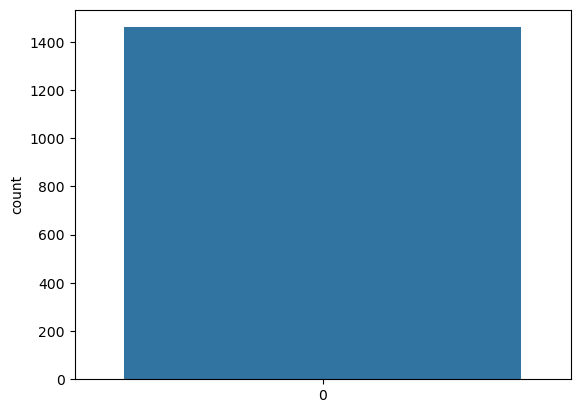

In [79]:
sns.countplot(train['MSZoning'])

In [85]:
for column in cat_col:
    num_unique = train[column].nunique()
    print(f'{column} has {num_unique} unique values')


MSZoning has 5 unique values
Street has 2 unique values
LotShape has 4 unique values
LandContour has 4 unique values
Utilities has 2 unique values
LotConfig has 5 unique values
LandSlope has 3 unique values
Neighborhood has 25 unique values
Condition1 has 9 unique values
Condition2 has 8 unique values
BldgType has 5 unique values
HouseStyle has 8 unique values
RoofStyle has 6 unique values
RoofMatl has 8 unique values
Exterior1st has 15 unique values
Exterior2nd has 16 unique values
MasVnrType has 5 unique values
ExterQual has 4 unique values
ExterCond has 5 unique values
Foundation has 6 unique values
BsmtQual has 5 unique values
BsmtCond has 5 unique values
BsmtExposure has 5 unique values
BsmtFinType1 has 7 unique values
BsmtFinType2 has 7 unique values
Heating has 6 unique values
HeatingQC has 5 unique values
CentralAir has 2 unique values
Electrical has 6 unique values
KitchenQual has 4 unique values
Functional has 7 unique values
GarageType has 7 unique values
GarageFinish has 4 

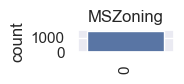

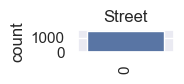

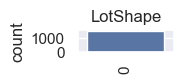

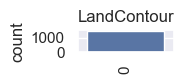

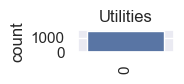

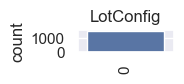

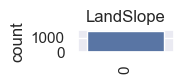

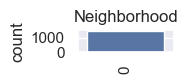

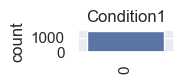

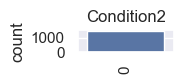

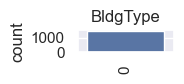

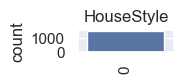

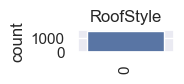

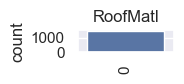

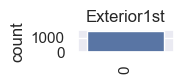

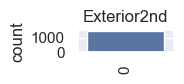

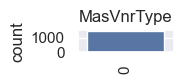

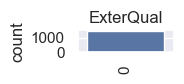

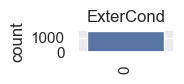

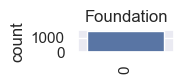

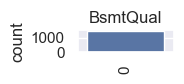

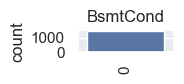

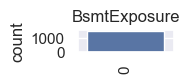

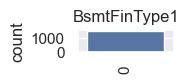

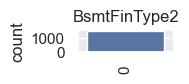

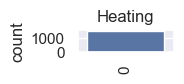

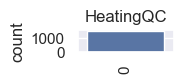

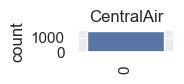

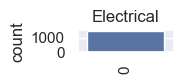

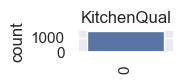

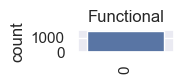

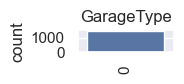

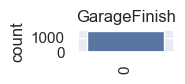

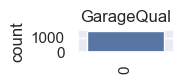

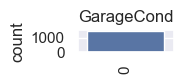

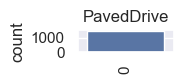

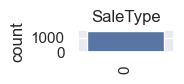

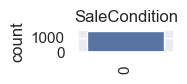

In [88]:
for column in cat_col:
    fig = plt.figure(figsize=(2, 1))
    sns.set(rc={'figure.autolayout': True})
    sns.countplot(train[column])
    plt.title(column)
    plt.xticks(rotation=90)
    plt.show()



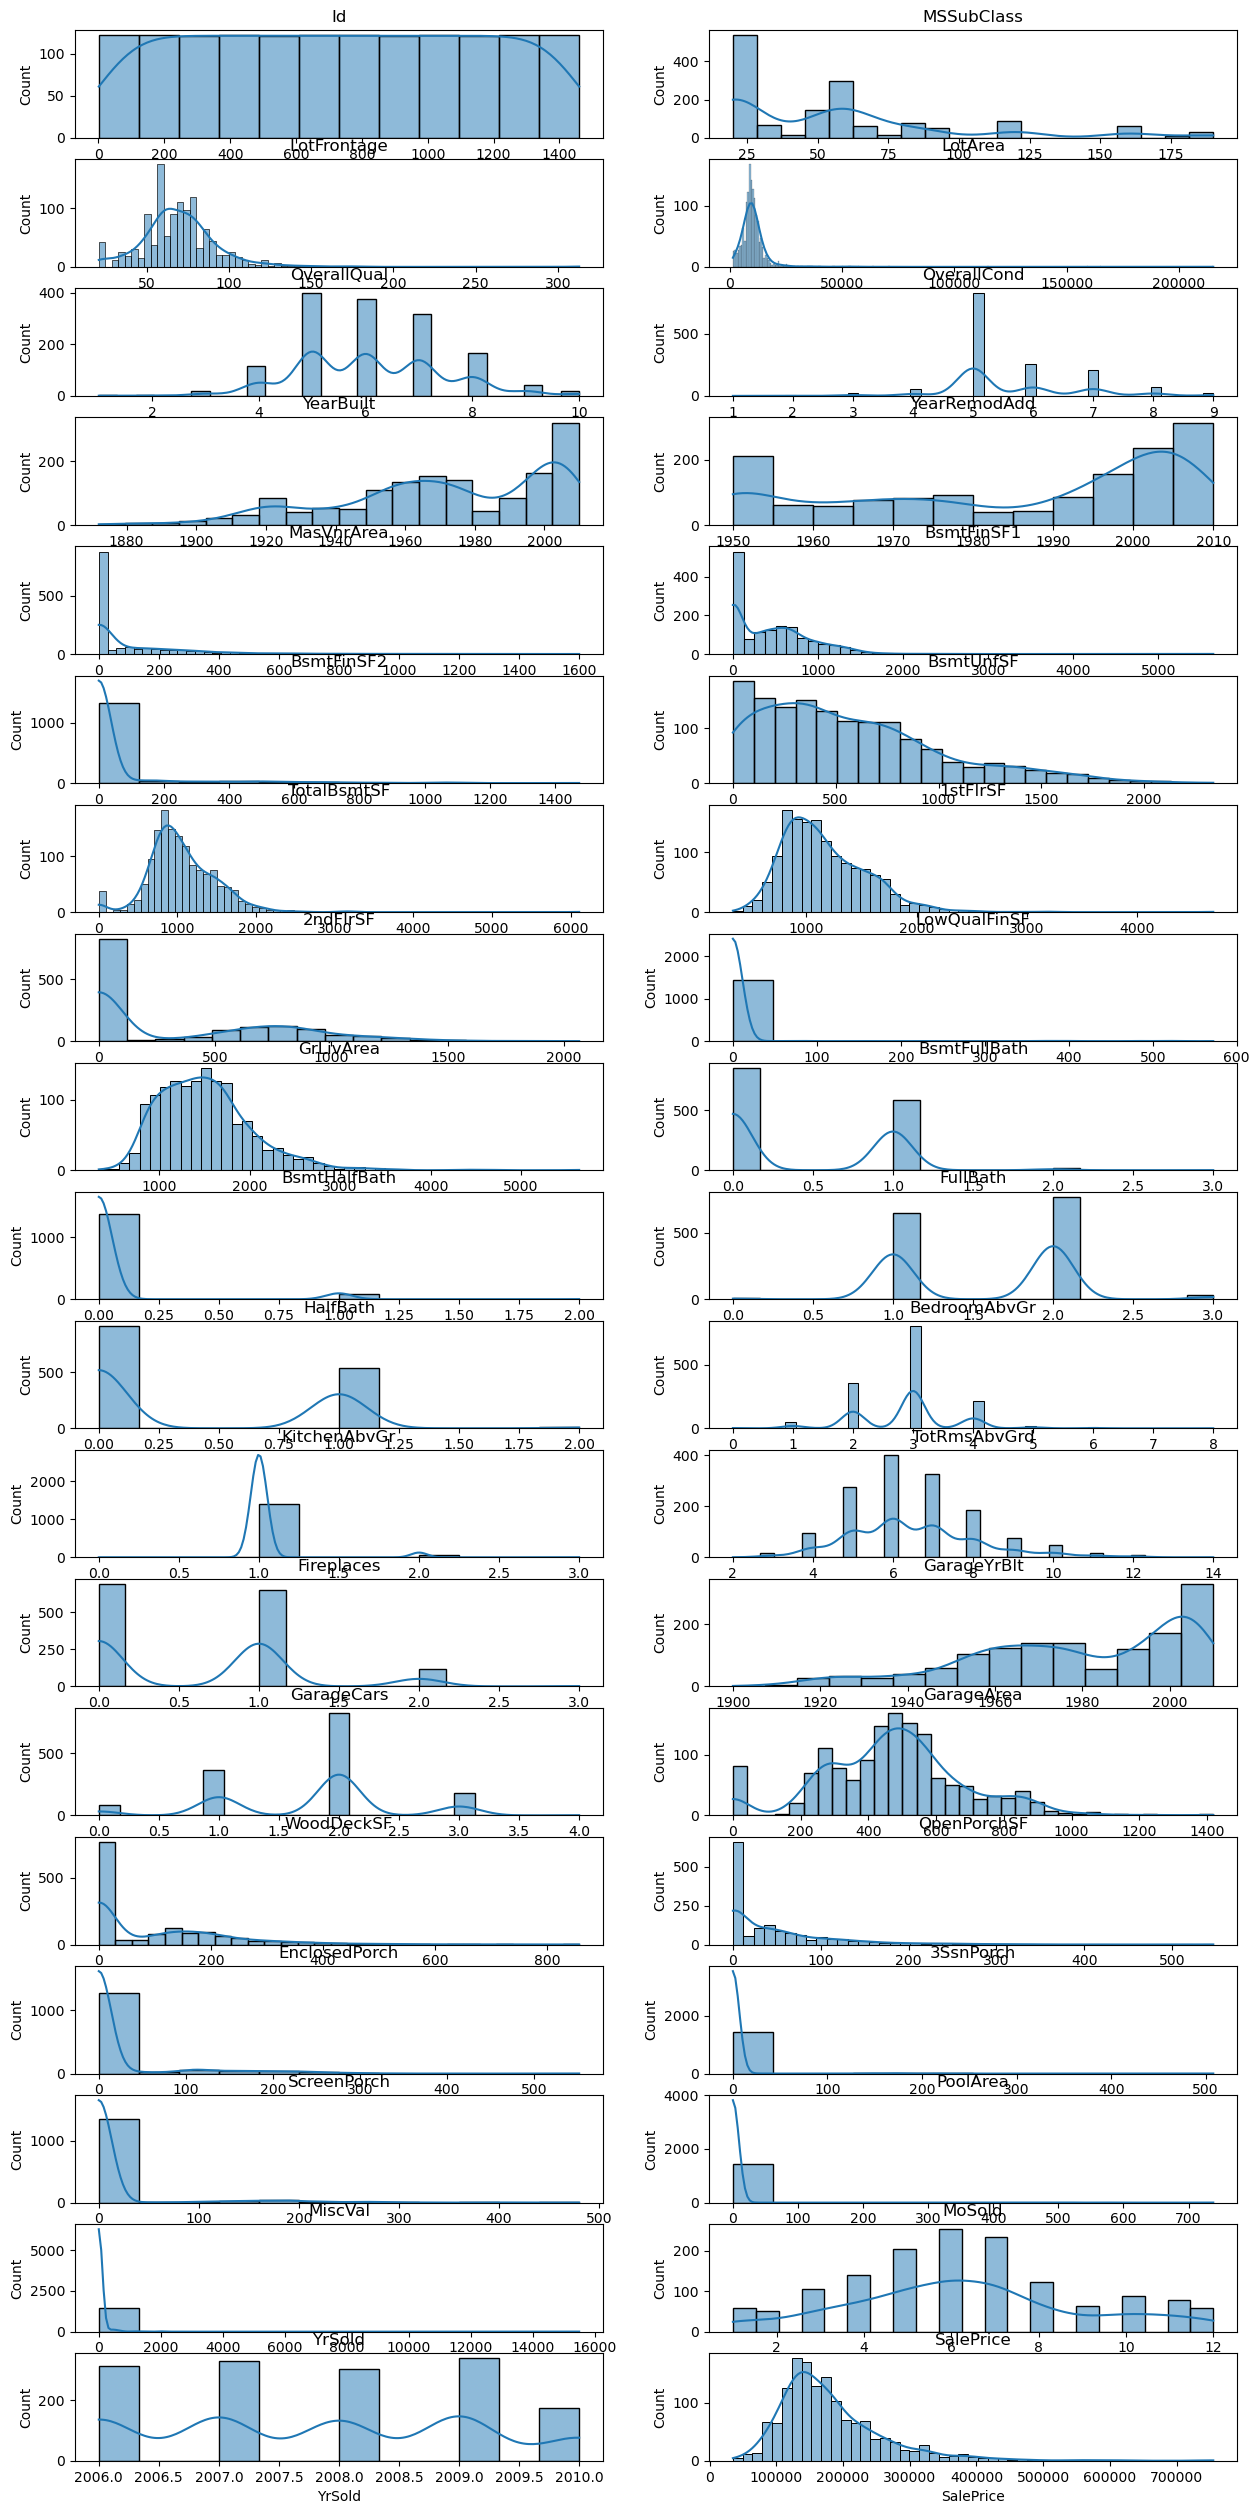

In [18]:
fig = plt.figure(figsize=(15, 50))
count=1
for i in train.columns:
    if train[i].dtype in ['int64','float64']:
        plt.subplot(30,2,count)
        sns.histplot(train[i],kde=True)
        count+=1
        plt.title(i)
plt.show()


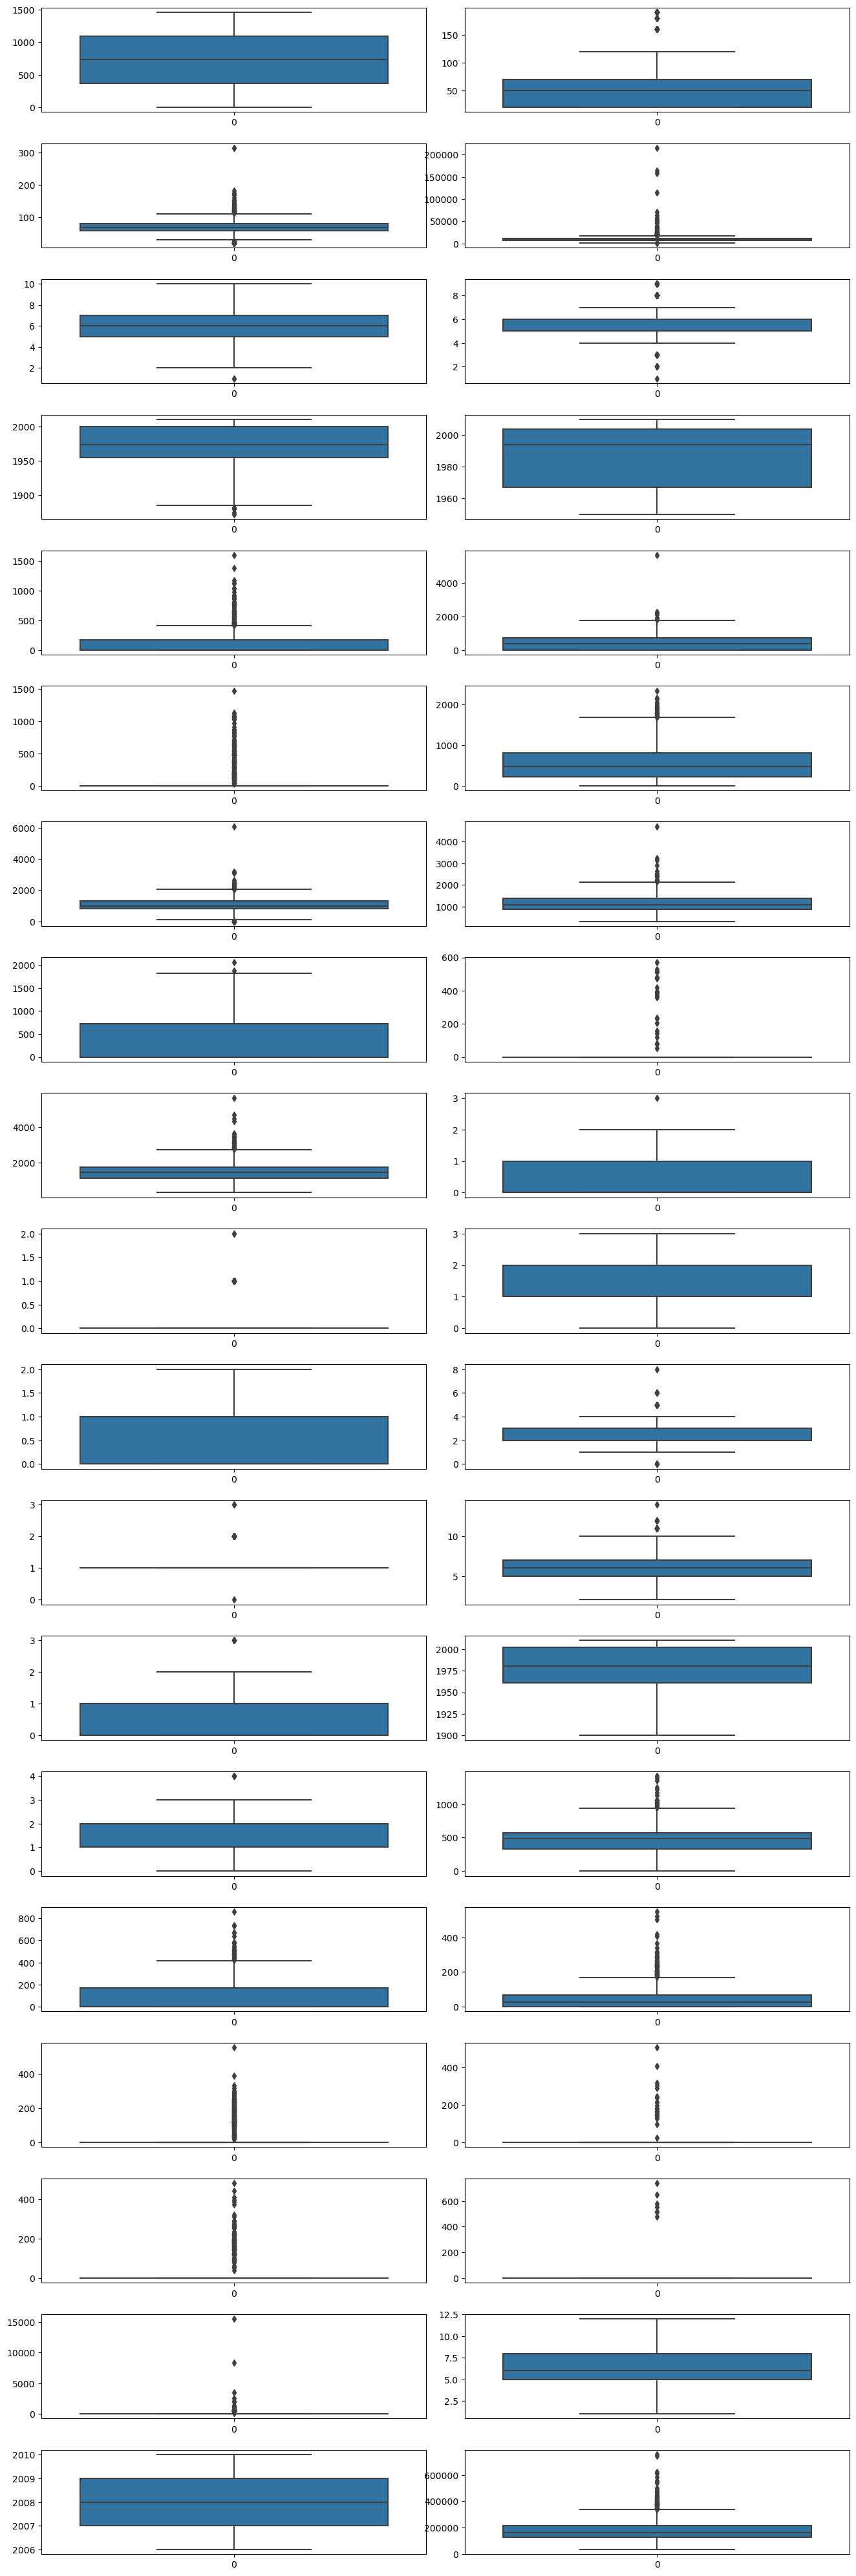

In [19]:
fig = plt.figure(figsize=(10, 50))
count=1
for i in train.columns:
    if train[i].dtype in ['int64','float64']:
        plt.subplots_adjust(left=0.75,bottom=0.75,right=2,top=2, wspace=0.1,hspace=0.3)
        plt.subplot(30,2,count)
        sns.boxplot(train[i])
        count+=1
        #plt.title(i)
plt.show()


In [20]:
# encoding the cat columns

In [21]:
lb=LabelEncoder()
for i in cat_col:
    train[i]=lb.fit_transform(train[i])
    test[i]=lb.fit_transform(test[i])

# There are no duplicate records

In [22]:
train.duplicated().sum()

0

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int32  
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int32  
 6   LotShape       1460 non-null   int32  
 7   LandContour    1460 non-null   int32  
 8   Utilities      1460 non-null   int32  
 9   LotConfig      1460 non-null   int32  
 10  LandSlope      1460 non-null   int32  
 11  Neighborhood   1460 non-null   int32  
 12  Condition1     1460 non-null   int32  
 13  Condition2     1460 non-null   int32  
 14  BldgType       1460 non-null   int32  
 15  HouseStyle     1460 non-null   int32  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [26]:
from sklearn.impute import SimpleImputer

# Mode imputation for categrical columns

In [89]:
mode_imputer=SimpleImputer(strategy='most_frequent')
for i in cat_col:
    train[i]=mode_imputer.fit_transform(train[i].values.reshape(-1,1))
    test[i]=mode_imputer.fit_transform(test[i].values.reshape(-1,1))

In [90]:
# Mean imputation for categrical columns

In [94]:
mean_imputer = SimpleImputer(strategy='mean')

numeric_cols = train.select_dtypes(include=['float64', 'int64']).columns
train[numeric_cols] = mean_imputer.fit_transform(train[numeric_cols])
numeric_cols = test.select_dtypes(include=['float64', 'int64']).columns
test[numeric_cols] = mean_imputer.fit_transform(test[numeric_cols])

In [31]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,3,65.0,8450.0,1,3,3,0,4,0,5,2,2,0,5,7.0,5.0,2003.0,2003.0,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706.0,5,0.0,150.0,856.0,1,0,1,4,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,2,8.0,6,0.0,1,2003.0,1,2.0,548.0,4,4,2,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,8,4,208500.0
1,2.0,20.0,3,80.0,9600.0,1,3,3,0,2,0,24,1,2,0,2,6.0,8.0,1976.0,1976.0,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978.0,5,0.0,284.0,1262.0,1,0,1,4,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,3,6.0,6,1.0,1,1976.0,1,2.0,460.0,4,4,2,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,8,4,181500.0
2,3.0,60.0,3,68.0,11250.0,1,0,3,0,4,0,5,2,2,0,5,7.0,5.0,2001.0,2002.0,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486.0,5,0.0,434.0,920.0,1,0,1,4,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,2,6.0,6,1.0,1,2001.0,1,2.0,608.0,4,4,2,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,8,4,223500.0
3,4.0,70.0,3,60.0,9550.0,1,0,3,0,0,0,6,2,2,0,5,7.0,5.0,1915.0,1970.0,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216.0,5,0.0,540.0,756.0,1,2,1,4,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,2,7.0,6,1.0,5,1998.0,2,3.0,642.0,4,4,2,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,8,0,140000.0
4,5.0,60.0,3,84.0,14260.0,1,0,3,0,2,0,15,2,2,0,5,8.0,5.0,2000.0,2000.0,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655.0,5,0.0,490.0,1145.0,1,0,1,4,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,2,9.0,6,1.0,1,2000.0,1,3.0,836.0,4,4,2,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,8,4,250000.0


In [32]:
correlation=train.corrwith(train.SalePrice)
corr=correlation[(correlation>0.5) | (correlation<-0.5)].index
train_corr=train[corr]
train_corr

,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,GarageFinish,GarageCars,GarageArea,SalePrice
0,7.0,2003.0,2003.0,2,2,856.0,856.0,1710.0,2.0,2,8.0,1,2.0,548.0,208500.0
1,6.0,1976.0,1976.0,3,2,1262.0,1262.0,1262.0,2.0,3,6.0,1,2.0,460.0,181500.0
2,7.0,2001.0,2002.0,2,2,920.0,920.0,1786.0,2.0,2,6.0,1,2.0,608.0,223500.0
3,7.0,1915.0,1970.0,3,3,756.0,961.0,1717.0,1.0,2,7.0,2,3.0,642.0,140000.0
4,8.0,2000.0,2000.0,2,2,1145.0,1145.0,2198.0,2.0,2,9.0,1,3.0,836.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6.0,1999.0,2000.0,3,2,953.0,953.0,1647.0,2.0,3,7.0,1,2.0,460.0,175000.0
1456,6.0,1978.0,1988.0,3,2,1542.0,2073.0,2073.0,2.0,3,7.0,2,2.0,500.0,210000.0
1457,7.0,1941.0,2006.0,0,3,1152.0,1188.0,2340.0,2.0,2,9.0,1,1.0,252.0,266500.0
1458,5.0,1950.0,1996.0,3,3,1078.0,1078.0,1078.0,1.0,2,5.0,2,1.0,240.0,142125.0


(<Figure size 1200x600 with 2 Axes>, <AxesSubplot:>)

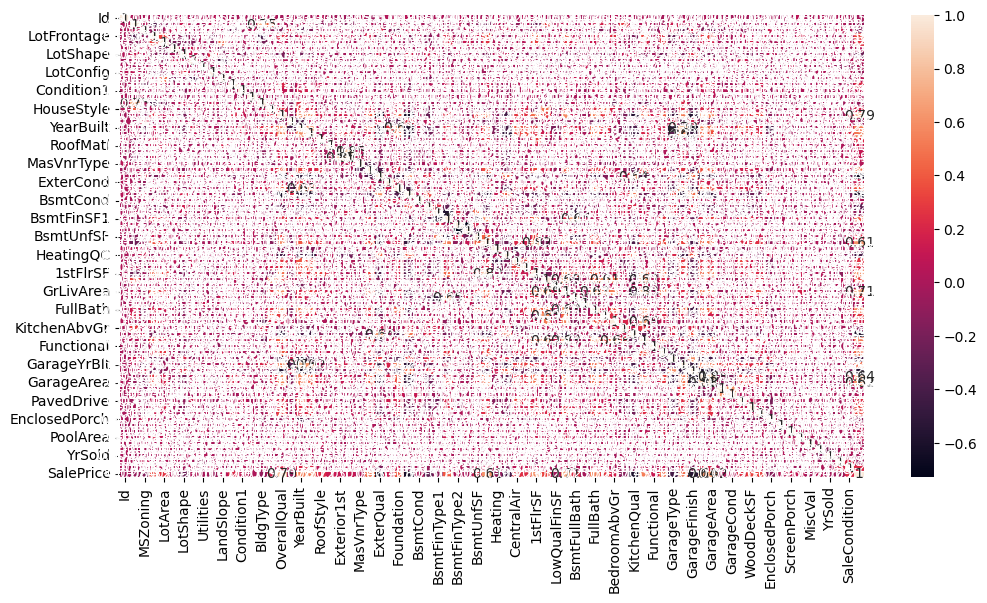

In [33]:
fig=plt.figure(figsize=(12,6))
fig,sns.heatmap(train.corr(),annot=True)

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
x=train.iloc[:,:-1]
y=train.SalePrice

In [36]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x)

# Feature engineering

In [37]:
from sklearn.feature_selection import SelectKBest,mutual_info_regression,RFE,f_regression,chi2

# f-regression

In [39]:
selector=SelectKBest(score_func=f_regression,k=5)
x_new=selector.fit_transform(x,y)

In [40]:
mask=selector.get_support()

In [41]:
selected_features=x.columns[mask]
selected_features

Index(['OverallQual', 'ExterQual', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object')

# Chi2

In [43]:
selector2=SelectKBest(score_func=chi2,k=5)
x_new2=selector.fit_transform(x,y)

mask2=selector.get_support()

selected_features2=x.columns[mask2]
selected_features2


Index(['OverallQual', 'ExterQual', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object')

# Mutual_regression

In [45]:
selector3=SelectKBest(score_func=mutual_info_regression,k=70)
x_new3=selector3.fit_transform(x,y)

mask3=selector3.get_support()

selected_features3=x.columns[mask3]
selected_features3_list=list(selected_features3)


# recurssive feature elimation

In [47]:
from sklearn.linear_model import LinearRegression

In [235]:
# Create a linear regression model
model = LinearRegression()

# Select the top 5 features using RFE
rfe = RFE(model)
X_new = rfe.fit_transform(x, y)

# Get the indices of the selected features
mask4 = rfe.support_

# Get the names of the selected features
selected_features4 = x.columns[mask4]
selected_features4

Index(['OverallQual', 'ExterQual', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd',
       'GarageFinish', 'SalePrice'],
      dtype='object')

In [49]:
cnt=0
for i in selected_features4:
    cnt+=1
print(cnt)

37


# Vif

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
vif=pd.DataFrame()
vif['Features']=x.columns
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
low_collinearity_vars = vif[vif['vif'] <= 5]
high_collinearity_vars = vif[vif['vif'] > 5]

In [53]:
low_collinearity_vars.reset_index()

,index,Features,vif
0,0,Id,4.245463
1,4,LotArea,3.447948
2,6,LotShape,3.639658
3,8,Utilities,1.095799
4,10,LandSlope,1.703116
5,20,RoofStyle,4.933811
6,21,RoofMatl,4.954298
7,25,MasVnrArea,2.333412
8,39,HeatingQC,2.941962
9,46,BsmtFullBath,3.913408


In [54]:
low_vif=train[low_collinearity_vars['Features']].corr()
low_vif

,Id,LotArea,LotShape,Utilities,LandSlope,RoofStyle,RoofMatl,MasVnrArea,HeatingQC,BsmtFullBath,BsmtHalfBath,HalfBath,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
Id,1.000000,-0.033226,0.032122,0.013324,0.005847,0.038675,-0.022562,-0.050199,0.002157,0.002289,-0.020155,0.006784,-0.019772,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242
LotArea,-0.033226,1.000000,-0.165315,0.010123,0.436868,0.077054,0.149837,0.103960,0.004212,0.158155,0.048046,0.014259,0.271364,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068
LotShape,0.032122,-0.165315,1.000000,-0.036101,-0.099951,0.003182,-0.071174,-0.105586,0.096248,-0.076178,-0.026824,-0.111072,-0.194285,-0.166946,-0.075412,0.078213,-0.036459,-0.053054,-0.020051,-0.042061
Utilities,0.013324,0.010123,-0.036101,1.000000,-0.005909,-0.012868,-0.003293,0.063427,0.006950,-0.021467,0.103380,-0.019939,0.015721,-0.019692,0.028199,-0.009407,-0.003046,0.102365,-0.001798,-0.002296
LandSlope,0.005847,0.436868,-0.099951,-0.005909,1.000000,-0.027739,0.178678,-0.021812,0.035674,0.116165,0.070299,0.000781,0.123995,0.095156,-0.032622,-0.008843,0.008694,0.052976,-0.015505,-0.003518
RoofStyle,0.038675,0.077054,0.003182,-0.012868,-0.027739,1.000000,-0.011139,0.248581,-0.015324,0.085768,0.001846,-0.013618,0.123260,0.079109,0.005978,-0.014673,0.022445,0.066667,0.019928,0.096802
RoofMatl,-0.022562,0.149837,-0.071174,-0.003293,0.178678,-0.011139,1.000000,0.034913,0.061017,0.051174,0.075090,0.033858,0.086188,0.120554,0.049440,-0.028918,-0.004490,0.101013,0.061746,-0.011031
MasVnrArea,-0.050199,0.103960,-0.105586,0.063427,-0.021812,0.248581,0.034913,1.000000,-0.144317,0.085055,0.026669,0.200802,0.247906,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815
HeatingQC,0.002157,0.004212,0.096248,0.006950,0.035674,-0.015324,0.061017,-0.144317,1.000000,-0.060988,0.037591,-0.100243,-0.122745,-0.107107,-0.174535,0.093826,-0.054349,0.055806,0.027533,0.019299
BsmtFullBath,0.002289,0.158155,-0.076178,-0.021467,0.116165,0.085768,0.051174,0.085055,-0.060988,1.000000,-0.147871,-0.030905,0.137928,0.175315,0.067341,-0.049911,-0.000106,0.023148,0.067616,-0.023047


In [55]:
high_vif=train[high_collinearity_vars['Features']].corr()
high_vif[high_vif>0.5]

,MSSubClass,MSZoning,LotFrontage,Street,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
MSSubClass,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.746063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSZoning,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Street,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotConfig,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Condition1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Condition2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BldgType,0.746063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# Lasso regularization

In [57]:
from sklearn.linear_model import Lasso,Ridge

In [58]:
rig=Lasso(alpha=0.5)

rig.fit(x_train,y)

print(rig.score(x_train,y))

0.85000230471299


In [59]:
rig_features=x.columns[rig.coef_==0]
rig_features

Index(['TotalBsmtSF'], dtype='object')

In [60]:
x1=x.copy()

In [61]:
x1.drop(columns=['Id','TotalBsmtSF','YearRemodAdd'],axis=1,inplace=True)

In [62]:
x1_train=scaler.fit_transform(x1)

In [63]:
rig1=Lasso(alpha=0.5)

rig1.fit(x1_train,y)

print(rig1.score(x1_train,y))

0.8498938367578341


In [64]:
rig_features=x1.columns[rig1.coef_==0]
rig_features

Index([], dtype='object')

In [65]:
vif=pd.DataFrame()
vif['Features']=x1.columns
vif['vif']=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
low_collinearity_vars = vif[vif['vif'] <= 5]
high_collinearity_vars = vif[vif['vif'] > 5]

In [66]:
low_collinearity_vars.reset_index()

,index,Features,vif
0,3,LotArea,3.441890
1,5,LotShape,3.635476
2,7,Utilities,1.094763
3,9,LandSlope,1.702790
4,18,RoofStyle,4.916601
5,19,RoofMatl,4.926035
6,23,MasVnrArea,2.324873
7,33,BsmtFinSF2,3.334586
8,36,HeatingQC,2.874696
9,43,BsmtFullBath,3.895038


In [67]:
# will try with Rfe

In [68]:
list(selected_features4)

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'CentralAir',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'GarageCond',
 'PavedDrive',
 'YrSold',
 'SaleCondition']

In [69]:
selected_features_indices = list(selected_features4)
x2 = x[list(selected_features3)]
x2

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60.0,3,65.0,8450.0,1,3,3,4,0,5,2,2,0,5,7.0,5.0,2003.0,2003.0,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706.0,5,0.0,150.0,856.0,0,1,4,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,2,8.0,6,0.0,1,2003.0,1,2.0,548.0,4,4,2,0.0,61.0,0.0,0.0,0.0,2.0,2008.0,8,4
1,20.0,3,80.0,9600.0,1,3,3,2,0,24,1,2,0,2,6.0,8.0,1976.0,1976.0,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978.0,5,0.0,284.0,1262.0,0,1,4,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,3,6.0,6,1.0,1,1976.0,1,2.0,460.0,4,4,2,298.0,0.0,0.0,0.0,0.0,5.0,2007.0,8,4
2,60.0,3,68.0,11250.0,1,0,3,4,0,5,2,2,0,5,7.0,5.0,2001.0,2002.0,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486.0,5,0.0,434.0,920.0,0,1,4,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,2,6.0,6,1.0,1,2001.0,1,2.0,608.0,4,4,2,0.0,42.0,0.0,0.0,0.0,9.0,2008.0,8,4
3,70.0,3,60.0,9550.0,1,0,3,0,0,6,2,2,0,5,7.0,5.0,1915.0,1970.0,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216.0,5,0.0,540.0,756.0,2,1,4,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,2,7.0,6,1.0,5,1998.0,2,3.0,642.0,4,4,2,0.0,35.0,272.0,0.0,0.0,2.0,2006.0,8,0
4,60.0,3,84.0,14260.0,1,0,3,2,0,15,2,2,0,5,8.0,5.0,2000.0,2000.0,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655.0,5,0.0,490.0,1145.0,0,1,4,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,2,9.0,6,1.0,1,2000.0,1,3.0,836.0,4,4,2,192.0,84.0,0.0,0.0,0.0,12.0,2008.0,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,3,62.0,7917.0,1,3,3,4,0,8,2,2,0,5,6.0,5.0,1999.0,2000.0,1,1,12,13,2,0.0,3,4,2,2,3,3,5,0.0,5,0.0,953.0,953.0,0,1,4,953.0,694.0,0.0,1647.0,0.0,0.0,2.0,1.0,3.0,1.0,3,7.0,6,1.0,1,1999.0,1,2.0,460.0,4,4,2,0.0,40.0,0.0,0.0,0.0,8.0,2007.0,8,4
1456,20.0,3,85.0,13175.0,1,3,3,4,0,14,2,2,0,2,6.0,6.0,1978.0,1988.0,1,1,9,10,3,119.0,3,4,1,2,3,3,0,790.0,4,163.0,589.0,1542.0,4,1,4,2073.0,0.0,0.0,2073.0,1.0,0.0,2.0,0.0,3.0,1.0,3,7.0,2,2.0,1,1978.0,2,2.0,500.0,4,4,2,349.0,0.0,0.0,0.0,0.0,2.0,2010.0,8,4
1457,70.0,3,66.0,9042.0,1,3,3,4,0,6,2,2,0,5,7.0,9.0,1941.0,2006.0,1,1,5,5,2,0.0,0,2,4,3,1,3,2,275.0,5,0.0,877.0,1152.0,0,1,4,1188.0,1152.0,0.0,2340.0,0.0,0.0,2.0,0.0,4.0,1.0,2,9.0,6,2.0,1,1941.0,1,1.0,252.0,4,4,2,0.0,60.0,0.0,0.0,2500.0,5.0,2010.0,8,4
1458,20.0,3,68.0,9717.0,1,3,3,4,0,12,2,2,0,2,5.0,6.0,1950.0,1996.0,3,1,8,8,2,0.0,3,4,1,3,3,2,2,49.0,4,1029.0,0.0,1078.0,2,1,0,1078.0,0.0,0.0,1078.0,1.0,0.0,1.0,0.0,2.0,1.0,2,5.0,6,0.0,1,1950.0,2,1.0,240.0,4,4,2,366.0,0.0,112.0,0.0,0.0,4.0,2010.0,8,4


In [70]:
x2_train=scaler.fit_transform(x2)

In [71]:
linear_model=LinearRegression()

linear_model.fit(x2_train,y)

linear_model.score(x2_train,y)

0.8494147961293291

# ANN-Artificial neural network

In [75]:
!pip install keras-tuner --upgrade

     ------------------------------------ 169.6/169.6 kB 785.0 kB/s eta 0:00:00
  Using cached kt_legacy-1.0.4-py3-none-any.whl (9.6 kB)
     ---------------------------------------- 1.5/1.5 MB 5.0 MB/s eta 0:00:00
     ---------------------------------------- 23.2/23.2 MB 7.2 MB/s eta 0:00:00
  Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl (895 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.1
    Uninstalling protobuf-3.20.1:
      Successfully uninstalled protobuf-3.20.1


In [99]:
import keras

In [76]:
from keras.models import Sequential
from keras.layers import Dense
from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers

# find the no of hidden layers

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [97]:
def build_model(hp):
    model =Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=100,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [100]:
tuner = RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=5,  executions_per_trial=3,directory='project',project_name='house price')

In [101]:
tuner.search(x_train,y_train,epochs=100,validation_data=(x_test, y_test))

Trial 5 Complete [00h 02m 58s]
val_mean_absolute_error: 24252.407552083332

Best val_mean_absolute_error So Far: 21588.763671875
Total elapsed time: 00h 11m 42s
INFO:tensorflow:Oracle triggered exit


In [102]:
tuner.results_summary()

Results summary
Results in project\house price
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 11
units_0: 32
units_1: 96
learning_rate: 0.01
units_2: 96
units_3: 32
units_4: 96
units_5: 64
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 96
units_11: 96
units_12: 64
units_13: 96
units_14: 96
units_15: 96
Score: 21588.763671875
Trial summary
Hyperparameters:
num_layers: 16
units_0: 32
units_1: 64
learning_rate: 0.001
units_2: 64
units_3: 64
units_4: 64
units_5: 96
units_6: 64
units_7: 96
units_8: 32
units_9: 64
units_10: 32
units_11: 32
units_12: 96
units_13: 64
units_14: 32
units_15: 64
Score: 22506.688151041668
Trial summary
Hyperparameters:
num_layers: 19
units_0: 64
units_1: 32
learning_rate: 0.0001
units_2: 64
units_3: 64
units_4: 64
units_5: 96
units_6: 32
units_7: 64
units_8: 32
units_9: 96
units_10: 64
units_11: 32
units_12: 96
units_13: 32
units_14: 64
units_15: 96
units_16: 32
units_17: 32
units_18: 32
Score: 24162.26171875
Trial summary
Hyperparame

In [ ]:
# Hyperparameters:
# num_layers: 11
# units_0: 32
# units_1: 96
# learning_rate: 0.01
# units_2: 96
# units_3: 32
# units_4: 96
# units_5: 64
# units_6: 32
# units_7: 32
# units_8: 32
# units_9: 32
# units_10: 96
# units_11: 96
# units_12: 64
# units_13: 96
# units_14: 96
# units_15: 96

In [104]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dropout,Dense
from keras.wrappers.scikit_learn import KerasClassifier,KerasRegressor


In [140]:
def create_model():
    model=Sequential()
    
    model.add(Dense(32,input_shape=(x_train.shape[1],),kernel_initializer='normal',activation='relu'))
    model.add(Dense(96,kernel_initializer='normal',activation='relu'))
    model.add(Dense(96,kernel_initializer='normal',activation='relu'))
    model.add(Dense(32,kernel_initializer='normal',activation='relu'))
    model.add(Dense(96,kernel_initializer='normal',activation='relu'))
    model.add(Dense(64,kernel_initializer='normal',activation='relu'))
    model.add(Dense(32,kernel_initializer='normal',activation='relu'))
    model.add(Dense(32,kernel_initializer='normal',activation='relu'))
    model.add(Dense(32,kernel_initializer='normal',activation='relu'))
    model.add(Dense(32,kernel_initializer='normal',activation='relu'))
    model.add(Dense(96,kernel_initializer='normal',activation='relu'))
    model.add(Dense(96,kernel_initializer='normal',activation='relu'))
    model.add(Dense(64,kernel_initializer='normal',activation='relu'))
    model.add(Dense(96,kernel_initializer='normal',activation='relu'))
    model.add(Dense(96,kernel_initializer='normal',activation='relu'))
    model.add(Dense(96,kernel_initializer='normal',activation='relu'))
    
    model.add(Dense(1,activation='linear'))
    
    adam=Adam(learning_rate=0.01)
    
    model.compile(metrics=['mean_absolute_error'],optimizer=adam,loss='mean_absolute_error')
    
    return model

In [141]:
from sklearn.model_selection import GridSearchCV,KFold

In [143]:
model1=KerasRegressor(build_fn=create_model,verbose=0)
batch_size=[10,20,30,50]
epochs=[10,50,100,200]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid=GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(),verbose=10,error_score='raise')

In [144]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START batch_size=10, epochs=10...................................
[CV 1/5; 1/16] END batch_size=10, epochs=10;, score=-35029.129 total time=   7.0s
[CV 2/5; 1/16] START batch_size=10, epochs=10...................................
[CV 2/5; 1/16] END batch_size=10, epochs=10;, score=-34200.445 total time=   8.7s
[CV 3/5; 1/16] START batch_size=10, epochs=10...................................
[CV 3/5; 1/16] END batch_size=10, epochs=10;, score=-56619.637 total time=   7.2s
[CV 4/5; 1/16] START batch_size=10, epochs=10...................................
[CV 4/5; 1/16] END batch_size=10, epochs=10;, score=-57456.617 total time=   7.7s
[CV 5/5; 1/16] START batch_size=10, epochs=10...................................
[CV 5/5; 1/16] END batch_size=10, epochs=10;, score=-54740.457 total time=   7.7s
[CV 1/5; 2/16] START batch_size=10, epochs=50...................................
[CV 1/5; 2/16] END batch_size=10, epochs=50

[CV 1/5; 11/16] END batch_size=30, epochs=100;, score=-39627.621 total time=  33.7s
[CV 2/5; 11/16] START batch_size=30, epochs=100.................................
[CV 2/5; 11/16] END batch_size=30, epochs=100;, score=-55092.902 total time=  19.8s
[CV 3/5; 11/16] START batch_size=30, epochs=100.................................
[CV 3/5; 11/16] END batch_size=30, epochs=100;, score=-23751.002 total time=  18.3s
[CV 4/5; 11/16] START batch_size=30, epochs=100.................................
[CV 4/5; 11/16] END batch_size=30, epochs=100;, score=-29416.848 total time=  29.8s
[CV 5/5; 11/16] START batch_size=30, epochs=100.................................
[CV 5/5; 11/16] END batch_size=30, epochs=100;, score=-21569.031 total time=  23.6s
[CV 1/5; 12/16] START batch_size=30, epochs=200.................................
[CV 1/5; 12/16] END batch_size=30, epochs=200;, score=-21586.551 total time=  39.8s
[CV 2/5; 12/16] START batch_size=30, epochs=200.................................
[CV 2/5; 1

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise',
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x000001C6AAFBCF40>,
             param_grid={'batch_size': [10, 20, 30, 50],
                         'epochs': [10, 50, 100, 200]},
             verbose=10)

In [145]:
grid.best_params_

{'batch_size': 20, 'epochs': 200}

In [179]:
x_train.shape[1]

75

In [183]:
def create_model2(activation_function,init):
    model=Sequential()
    
    model.add(Dense(32,input_shape=(75,),kernel_initializer=init,activation=activation_function))
    model.add(Dense(96,kernel_initializer=init,activation=activation_function))
    model.add(Dense(96,kernel_initializer=init,activation=activation_function))
    model.add(Dense(32,kernel_initializer=init,activation=activation_function))
    model.add(Dense(96,kernel_initializer=init,activation=activation_function))
    model.add(Dense(64,kernel_initializer=init,activation=activation_function))
    model.add(Dense(32,kernel_initializer=init,activation=activation_function))
    model.add(Dense(32,kernel_initializer=init,activation=activation_function))
    model.add(Dense(32,kernel_initializer=init,activation=activation_function))
    model.add(Dense(32,kernel_initializer=init,activation=activation_function))
    model.add(Dense(96,kernel_initializer=init,activation=activation_function))
    model.add(Dense(96,kernel_initializer=init,activation=activation_function))
    model.add(Dense(64,kernel_initializer=init,activation=activation_function))
    model.add(Dense(96,kernel_initializer=init,activation=activation_function))
    model.add(Dense(96,kernel_initializer=init,activation=activation_function))
    model.add(Dense(96,kernel_initializer=init,activation=activation_function))
    
    model.add(Dense(1,activation='linear'))
    
    adam=Adam(learning_rate=0.01)
    
    model.compile(metrics=['mean_absolute_error'],optimizer=adam,loss='mean_absolute_error')
    
    return model


In [184]:
model3=KerasRegressor(build_fn=create_model2,batch_size=20,epochs=200,verbose=0)
activation_function=['softmax','tanh','relu']
init=['normal','uniform','glorot_uniform']
param_grid=dict(activation_function=activation_function,init=init)
grid2 = GridSearchCV(estimator=model3,param_grid=param_grid,cv=KFold(),verbose=10,error_score='raise')

In [185]:
grid2.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START activation_function=softmax, init=normal....................
[CV 1/5; 1/9] END activation_function=softmax, init=normal;, score=-187392.609 total time=  43.6s
[CV 2/5; 1/9] START activation_function=softmax, init=normal....................
[CV 2/5; 1/9] END activation_function=softmax, init=normal;, score=-181948.141 total time=  50.2s
[CV 3/5; 1/9] START activation_function=softmax, init=normal....................
[CV 3/5; 1/9] END activation_function=softmax, init=normal;, score=-176191.750 total time=  51.1s
[CV 4/5; 1/9] START activation_function=softmax, init=normal....................
[CV 4/5; 1/9] END activation_function=softmax, init=normal;, score=-178215.062 total time=  57.9s
[CV 5/5; 1/9] START activation_function=softmax, init=normal....................
[CV 5/5; 1/9] END activation_function=softmax, init=normal;, score=-181935.906 total time=  59.3s
[CV 1/5; 2/9] START activation_function=softm

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise',
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x000001C6BC2C97C0>,
             param_grid={'activation_function': ['softmax', 'tanh', 'relu'],
                         'init': ['normal', 'uniform', 'glorot_uniform']},
             verbose=10)

In [186]:
grid2.best_params_

{'activation_function': 'relu', 'init': 'uniform'}

# Ann model building

In [ ]:
# Hyperparameters:
# num_layers: 11
# units_0: 32
# units_1: 96
# learning_rate: 0.01
# units_2: 96
# units_3: 32
# units_4: 96
# units_5: 64
# units_6: 32
# units_7: 32
# units_8: 32
# units_9: 32
# units_10: 96
# units_11: 96
# units_12: 64
# units_13: 96
# units_14: 96
# units_15: 96
# {'activation_function': 'relu', 'init': 'uniform'}
# {'batch_size': 20, 'epochs': 200}

In [230]:
X_train.shape[1]

14

In [231]:
model=Sequential()

#Input
model.add(Dense(32,input_shape=(14,),kernel_initializer='uniform',activation='relu'))
model.add(Dense(96,kernel_initializer='uniform',activation='relu'))
model.add(Dense(96,kernel_initializer='uniform',activation='relu'))
model.add(Dense(32,kernel_initializer='uniform',activation='relu'))
model.add(Dense(96,kernel_initializer='uniform',activation='relu'))
model.add(Dense(64,kernel_initializer='uniform',activation='relu'))
model.add(Dense(32,kernel_initializer='uniform',activation='relu'))
model.add(Dense(32,kernel_initializer='uniform',activation='relu'))
model.add(Dense(32,kernel_initializer='uniform',activation='relu'))
model.add(Dense(32,kernel_initializer='uniform',activation='relu'))          
model.add(Dense(96,kernel_initializer='uniform',activation='relu'))
model.add(Dense(96,kernel_initializer='uniform',activation='relu'))
model.add(Dense(64,kernel_initializer='uniform',activation='relu'))
model.add(Dense(96,kernel_initializer='uniform',activation='relu'))
model.add(Dense(96,kernel_initializer='uniform',activation='relu'))
model.add(Dense(96,kernel_initializer='uniform',activation='relu'))
          
#output
model.add(Dense(1,activation='linear'))
          
adam=Adam(learning_rate=0.01)

model.compile(metrics=['mean_absolute_error'],optimizer=adam,loss='mean_absolute_error')

model.fit(X_train,y_train,epochs=200,batch_size=20)


Epoch 1/200
52/52 [==============================] - 1s 4ms/step - loss: 140907.1562 - mean_absolute_error: 140907.1562
Epoch 2/200
52/52 [==============================] - 0s 4ms/step - loss: 38126.8164 - mean_absolute_error: 38126.8164
Epoch 3/200
52/52 [==============================] - 0s 4ms/step - loss: 34147.3398 - mean_absolute_error: 34147.3398
Epoch 4/200
52/52 [==============================] - 0s 4ms/step - loss: 29833.6641 - mean_absolute_error: 29833.6641
Epoch 5/200
52/52 [==============================] - 0s 4ms/step - loss: 31887.1152 - mean_absolute_error: 31887.1113
Epoch 6/200
52/52 [==============================] - 0s 4ms/step - loss: 32091.0195 - mean_absolute_error: 32091.0195
Epoch 7/200
52/52 [==============================] - 0s 4ms/step - loss: 28373.3027 - mean_absolute_error: 28373.3047
Epoch 8/200
52/52 [==============================] - 0s 4ms/step - loss: 36941.9805 - mean_absolute_error: 36941.9805
Epoch 9/200
52/52 [==============================] - 0

52/52 [==============================] - 0s 9ms/step - loss: 22935.7930 - mean_absolute_error: 22935.7949
Epoch 70/200
52/52 [==============================] - 0s 8ms/step - loss: 19071.0879 - mean_absolute_error: 19071.0879
Epoch 71/200
52/52 [==============================] - 0s 7ms/step - loss: 19305.3652 - mean_absolute_error: 19305.3652
Epoch 72/200
52/52 [==============================] - 0s 6ms/step - loss: 19153.8887 - mean_absolute_error: 19153.8887
Epoch 73/200
52/52 [==============================] - 0s 7ms/step - loss: 19546.1855 - mean_absolute_error: 19546.1875
Epoch 74/200
52/52 [==============================] - 0s 7ms/step - loss: 21389.1719 - mean_absolute_error: 21389.1719
Epoch 75/200
52/52 [==============================] - 0s 6ms/step - loss: 21422.3477 - mean_absolute_error: 21422.3477
Epoch 76/200
52/52 [==============================] - 0s 6ms/step - loss: 19321.7168 - mean_absolute_error: 19321.7168
Epoch 77/200
52/52 [==============================] - 0s 6ms/

52/52 [==============================] - 0s 6ms/step - loss: 16366.4814 - mean_absolute_error: 16366.4814
Epoch 138/200
52/52 [==============================] - 0s 6ms/step - loss: 16310.1982 - mean_absolute_error: 16310.1982
Epoch 139/200
52/52 [==============================] - 0s 6ms/step - loss: 17972.2695 - mean_absolute_error: 17972.2695
Epoch 140/200
52/52 [==============================] - 0s 6ms/step - loss: 17552.0039 - mean_absolute_error: 17552.0039
Epoch 141/200
52/52 [==============================] - 0s 6ms/step - loss: 17354.7559 - mean_absolute_error: 17354.7559
Epoch 142/200
52/52 [==============================] - 0s 6ms/step - loss: 17365.2227 - mean_absolute_error: 17365.2227
Epoch 143/200
52/52 [==============================] - 0s 6ms/step - loss: 20818.3047 - mean_absolute_error: 20818.3047
Epoch 144/200
52/52 [==============================] - 0s 7ms/step - loss: 17272.8398 - mean_absolute_error: 17272.8418
Epoch 145/200
52/52 [==============================] -

In [232]:
y_pred=model.predict(x_test)
print('Mean_sq_Error',metrics.mean_squared_error(y_test,y_pred))
print('Mean_Ab_Error',metrics.mean_absolute_error(y_test,y_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print(metrics.r2_score(y_test,y_pred))

14/14 [==============================] - 0s 4ms/step
Mean_sq_Error 910292321.1071234
Mean_Ab_Error 19943.650604666094
RMSE 30171.051044123793
0.8695500014341179


In [195]:
df=pd.DataFrame()
df['Actual']=y_test
df['Predicted']=model.predict(x_test)
df

14/14 [==============================] - 0s 3ms/step


,Actual,Predicted
892,154500.0,144021.875000
1105,325000.0,370691.343750
413,115000.0,126364.554688
522,159000.0,175764.593750
1036,315500.0,320021.062500
614,75500.0,97276.468750
218,311500.0,209515.453125
1160,146000.0,164320.671875
649,84500.0,88142.101562
887,135500.0,162737.343750


In [197]:
test_data=scaler.fit_transform(test)

In [233]:
test_data.shape[1]

14

In [234]:
answer = pd.read_csv('E:\\house-prices-advanced-regression-techniques\\sample_submission.csv')
answer['SalePrice'] = model.predict(test_data)
answer.to_csv('submission_sales3.csv', index=False)

46/46 [==============================] - 0s 3ms/step


In [208]:
col=list(train_corr)
col

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'ExterQual',
 'BsmtQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'SalePrice']

In [212]:
x=train[col]
X=x.iloc[:,:-1]
y=x.SalePrice

In [213]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [216]:
X_train=scaler.fit_transform(x_train)
X_test=scaler.fit_transform(x_test)

# Xgboost

In [215]:
import xgboost

In [219]:
xg_model=xgboost.XGBRFRegressor()
xg_model.fit(X_train,y_train)
y_pred=xg_model.predict(X_test)
print('Mean_sq_Error',metrics.mean_squared_error(y_test,y_pred))
print('Mean_Ab_Error',metrics.mean_absolute_error(y_test,y_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print(metrics.r2_score(y_test,y_pred))

Mean_sq_Error 782949002.0784365
Mean_Ab_Error 19146.722406535388
RMSE 27981.225885912085
0.8877990137562948


In [223]:
col.pop()

'SalePrice'

In [227]:
test_data=test[col]
test_data

,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,GarageFinish,GarageCars,GarageArea
0,5.0,1961.0,1961.0,3,3,882.0,896.0,896.0,1.0,3,5.0,2,1.0,730.0
1,6.0,1958.0,1958.0,3,3,1329.0,1329.0,1329.0,1.0,2,6.0,2,1.0,312.0
2,5.0,1997.0,1998.0,3,2,928.0,928.0,1629.0,2.0,3,6.0,0,2.0,482.0
3,6.0,1998.0,1998.0,3,3,926.0,926.0,1604.0,2.0,2,7.0,0,2.0,470.0
4,8.0,1992.0,1992.0,2,2,1280.0,1280.0,1280.0,2.0,2,5.0,1,2.0,506.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4.0,1970.0,1970.0,3,3,546.0,546.0,1092.0,1.0,3,5.0,3,0.0,0.0
1455,4.0,1970.0,1970.0,3,3,546.0,546.0,1092.0,1.0,3,6.0,2,1.0,286.0
1456,5.0,1960.0,1996.0,3,3,1224.0,1224.0,1224.0,1.0,3,7.0,2,2.0,576.0
1457,5.0,1992.0,1992.0,3,2,912.0,970.0,970.0,1.0,3,6.0,3,0.0,0.0


In [228]:
test_data=scaler.fit_transform(test_data)

In [229]:
answer = pd.read_csv('E:\\house-prices-advanced-regression-techniques\\sample_submission.csv')
answer['SalePrice'] = xg_model.predict(test_data)
answer.to_csv('submission_sales1.csv', index=False)